# Example of SVMs: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into scikit-learn:

In [1]:

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [2]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

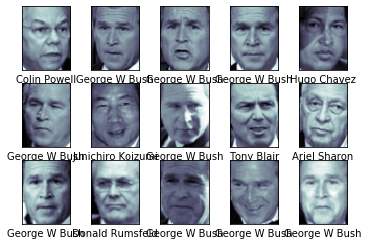

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but it is often more effective to use some sort of preprocessor to extract more meaningful features. Here we will use a dimensionality reduction technique known as Principal Component Analysis (see the <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html" target="_blank">Principal Component Analysis</a> section of the _Python Data Science Handbook_ for details) to extract 150 fundamental components to feed into our support vector machine classifier.

We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:
The pca step is like this *pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)*

For the sake of testing our classifier output, we will split the data into a training and testing set:

Finally, we can use a grid search cross-validation to explore combinations of parameters.
Here we will adjust ``C`` (which controls the margin hardness) and ``gamma`` (which controls the size of the radial basis function kernel), and determine the best model:

The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

Let's take a look at a few of the test images along with their predicted values:

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair).
We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

We might also display the confusion matrix between these classes. Use a seaborn heatmap:

This helps us get a sense of which labels are likely to be confused by the estimator.

For a real-world facial recognition task, in which the photos do not come precropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces and extract features that are independent of the pixellation.
For this kind of application, one good option is to make use of <a href="http://opencv.org" target="_blank">OpenCV</a>, which, among other things, includes pretrained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.